In [1]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from time import time
from Agents import NStepExpectedSarsa, NStepTreeBackup, DynaExpectedSarsa, DynaQ
from AgentComponents import LinearSchedule, SigmoidSchedule, UpDownSchedule
from Environments import RaceTrack, track_easy, track_hard, track_challenge, track_impossible
from ParameterStudy import ParameterStudy
from IPython.display import Image

# Train an agent

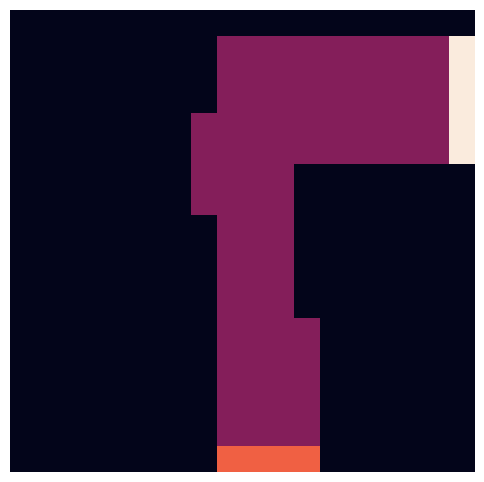

In [2]:
track = RaceTrack(track_easy)
track.set_test()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(track.track, ax=ax, cbar=False)
ax.axis('off')
plt.show()

In [3]:
plan_steps = 10
epsilon = 0.0
alpha = 0.5
discount = 1
num_states = track.num_states
num_actions = track.num_actions
eps_schedule = UpDownSchedule(epsilon, 0.02)
alp_schedule = LinearSchedule(alpha, 0.01)

agent = DynaQ(
    plan_steps,
    epsilon,
    alpha,
    discount,
    num_states,
    num_actions,
    eps_schedule,
    alp_schedule,
)

In [9]:
agent.train(track, 1000)

Episodes:  10%|9         | 99/1000 [00:00<?, ?it/s]

Episode finished! Rendering animation...


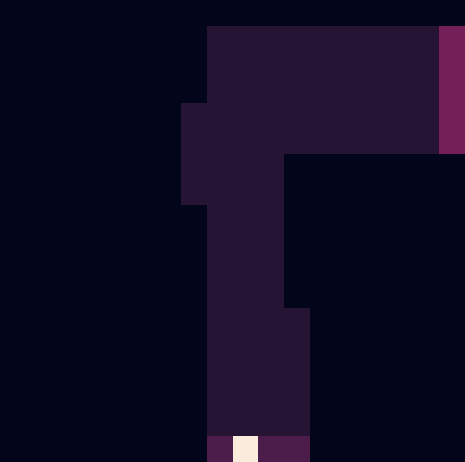

In [10]:
episode, _, _ = agent.play_episode(track, True, 100)
print("Episode finished! Rendering animation...")
ep_name = "testing"
filename = track.render_episode(episode, ep_name=ep_name)
Image(filename)

# Visualize the values

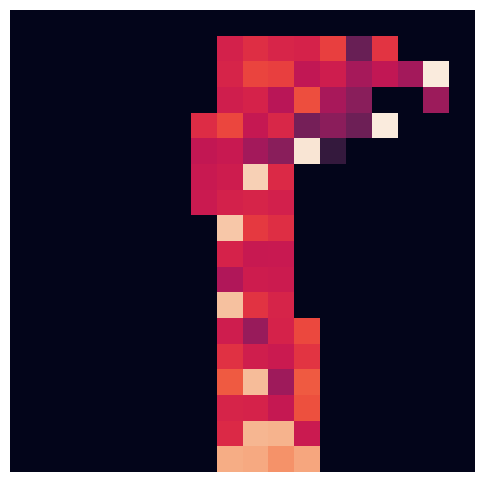

In [6]:
Q = agent.Q.reshape((track.track.shape[0], track.track.shape[1], -1, agent.num_actions))
state_values = np.max(np.max(Q, axis=-1), axis=-1)
fig, ax = plt.subplots(figsize=(6, 6), frameon=False)
sns.heatmap(state_values, ax=ax, cbar=False)
ax.axis('off')
plt.show()

# Run a parameter study

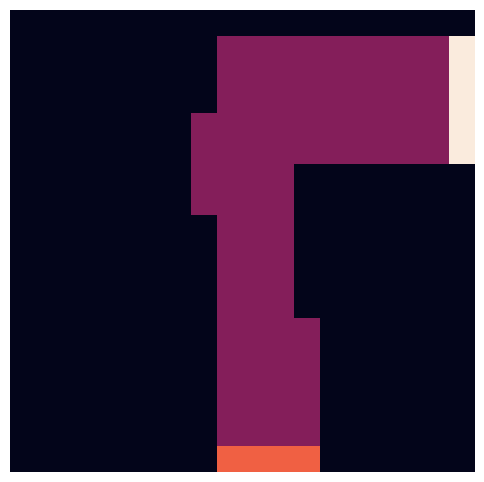

Process number 5 finished!
Process number 1 finished!
Process number 13 finished!
Process number 9 finished!
Process number 14 finished!
Process number 17 finished!
Process number 6 finished!
Process number 18 finished!
Process number 2 finished!
Process number 10 finished!
Process number 25 finished!
Process number 21 finished!
Process number 15 finished!
Process number 8 finished!
Process number 19 finished!
Process number 20 finished!
Process number 3 finished!
Process number 7 finished!
Process number 11 finished!
Process number 22 finished!
Process number 29 finished!
Process number 26 finished!
Process number 12 finished!
Process number 4 finished!
Process number 16 finished!
Process number 23 finished!
Process number 27 finished!
Process number 30 finished!
Process number 28 finished!
Process number 24 finished!
Process number 31 finished!
Process number 33 finished!
Process number 32 finished!
Process number 41 finished!
Process number 37 finished!
Process number 45 finished!
P

In [16]:
study_track = RaceTrack(track_easy)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(study_track.track, ax=ax, cbar=False)
ax.axis('off')
plt.show()

agent_type = DynaQ
pd = {
    "epsilon": [0.01, 0.08, 0.64, 0.8],
    "alpha": [0.25, 0.375, 0.5, 0.625],
    "plan_steps": [1, 2, 3, 4],
    "discount": [1],
}

study = ParameterStudy(agent_type, study_track, pd)

num_runs = 10
num_episodes = 100
study.sweep(num_runs, num_episodes)

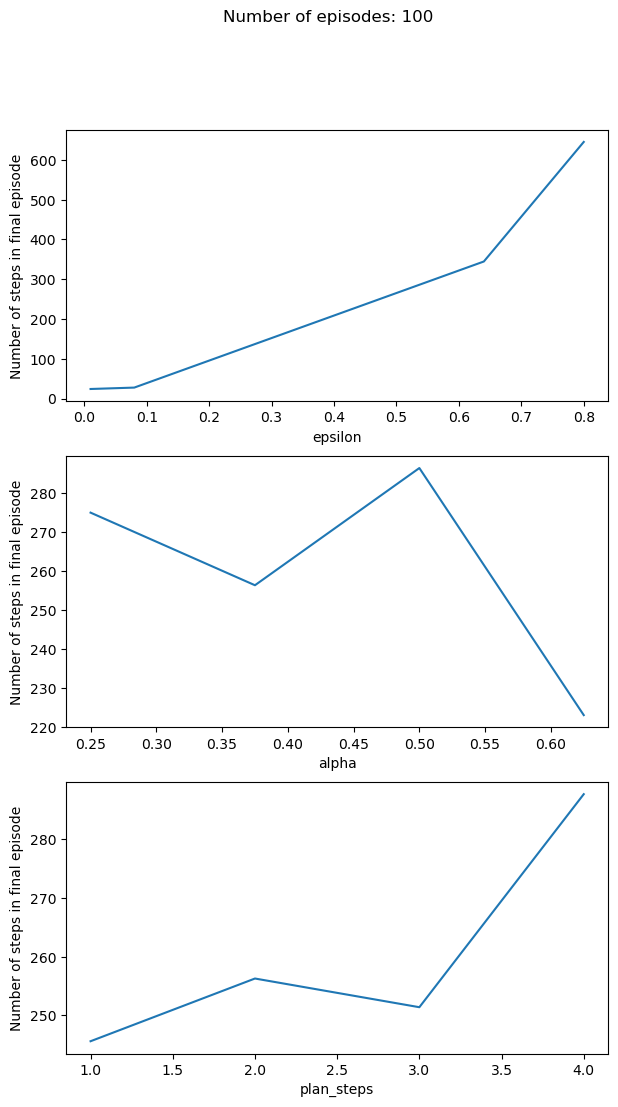

In [17]:
render_first = 3
filename = f"racetrack_param_sweeps/{int(time() // 60)}.png"
study.plot_results(render_first, filename)

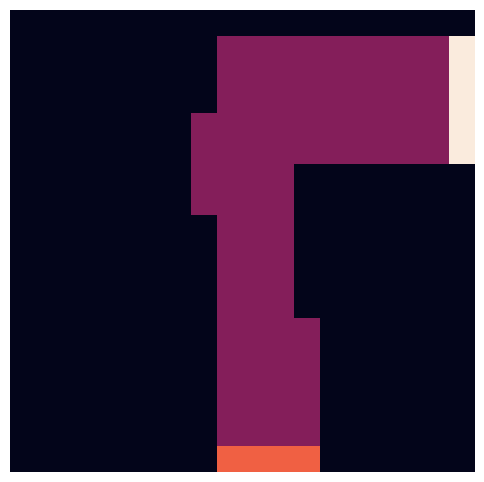

Process number 13 finished!
Process number 5 finished!
Process number 17 finished!
Process number 1 finished!
Process number 9 finished!
Process number 21 finished!
Process number 7 finished!
Process number 11 finished!
Process number 4 finished!
Process number 14 finished!
Process number 10 finished!
Process number 18 finished!
Process number 6 finished!
Process number 2 finished!
Process number 25 finished!
Process number 19 finished!
Process number 3 finished!
Process number 22 finished!
Process number 15 finished!
Process number 20 finished!
Process number 29 finished!
Process number 26 finished!
Process number 12 finished!
Process number 16 finished!
Process number 30 finished!
Process number 8 finished!
Process number 27 finished!
Process number 23 finished!
Process number 24 finished!
Process number 31 finished!
Process number 32 finished!
Process number 33 finished!
Process number 28 finished!
Process number 41 finished!
Process number 37 finished!
Process number 45 finished!
P

In [18]:
study_track = RaceTrack(track_easy)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(study_track.track, ax=ax, cbar=False)
ax.axis('off')
plt.show()

agent_type = DynaExpectedSarsa
pd = {
    "epsilon": [0.01, 0.08, 0.64, 0.8],
    "alpha": [0.25, 0.375, 0.5, 0.625],
    "plan_steps": [1, 2, 3, 4],
    "discount": [1],
}

study = ParameterStudy(agent_type, study_track, pd)

num_runs = 10
num_episodes = 100
study.sweep(num_runs, num_episodes)

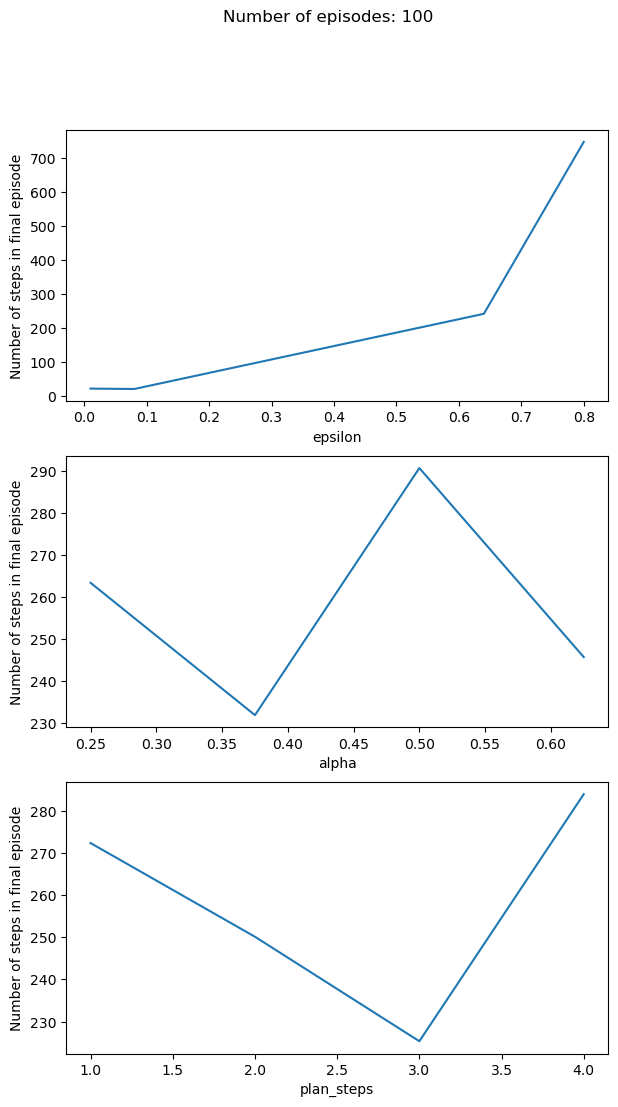

In [19]:
render_first = 3
filename = f"racetrack_param_sweeps/{int(time() // 60)}.png"
study.plot_results(render_first, filename)